<a href="https://colab.research.google.com/github/sangyeun003/sangyeun003/blob/main/2022920027_%EB%B0%95%EC%83%81%EC%9C%A4_%EA%B3%BC%EC%A0%9C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np      # 행렬 계산을 할 수 있게 해줌
import scipy as sp      # 통계량 계산 및 기본적인 데이터 분석을 하게 해줌
import pandas as pd     # pandas dataframe을 다루게 해줌

from scipy import stats # scipy 중에서도 통계 분석에 특화된 기능을 불러옴
%precision 3    # "%.3f"    소수점 아래 3자리까지만 나오게 함

'3    # "%.3f"    소수점 아래 3자리까지만 나오게 함'

In [20]:
# scipy.stats & percentile
fish_data_3 = np.array([1,2,3,4,5,6,7,8,9])     # [1,2,3,4,5,6,7,8,9] 배열을 fish_data_3에 저장

In [21]:
stats.scoreatpercentile(fish_data_3, 25)        # 배열 원소를 오름차순으로 정렬했을 때, 앞에서 25%에 위치한 값(사분위 구하기)

3.0

In [ ]:
stats.scoreatpercentile(fish_data_3, 75)        # 배열 원소를 오름차순으로 정렬했을 때, 앞에서 75%에 위치한 값(사분위 구하기)

In [ ]:
from google.colab import files  # file을 업로드하기 위한 명령어
uploaded = files.upload()       # file 업로드
for fn in uploaded.keys():      # 업로드한 파일에 대해 반복문 돌림
    print('User uploaded file "{name}" with length {length} bytes'.format(name = fn, length = len(uploaded[fn])))   # 업로드된 파일명과 크기를 출력함

In [ ]:
# 3.2 다변량 데이터
fish_multi = pd.read_csv("3-2-1-fish_multi.csv")       # fish_multi 변수에 "3-2-1-fish_multi.csv"을 불러와서 저장
print(fish_multi)                                      # fish_multi 출력

In [24]:
from google.colab import drive      # mount하기 위한 작업
drive.mount('/content/drive')       # 내 드라이브를 코랩에서 사용할 수 있도록 mount 함.

Mounted at /content/drive


In [25]:
!pwd    # print working directory, 현재 작업 중인 폴더명 출력

/content


In [26]:
!ls ./drive/MyDrive/ -al    # MyDrive 폴더 안에 있는 모든 파일의 정보를 자세히 보여줌

total 17
drwx------ 2 root root 4096 Mar 16 03:22 'Colab Notebooks'
drwx------ 2 root root 4096 Mar 10 02:03  test
-rw------- 1 root root  306 Mar 17 01:39  Untitled
drwx------ 2 root root 4096 Mar 23 02:08  모음
drwx------ 2 root root 4096 Mar 23 06:54  이산수학


In [27]:
group = fish_multi.groupby("species")   # 유형별 그룹
print(group.mean())                     # 각 그룹의 평균치 출력
print(group.std(ddof=1))                # 각 그룹의 표본표준편차 출력

group.describe()                        # 각 변수에 대한 평균과 표준편차, 최소값 최대값 및 백분위 값을 함께 출력

         length
species        
A           3.0
B           8.0
         length
species        
A           1.0
B           2.0


length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

In [8]:
shoes = pd.read_csv("3-2-2-shoes.csv")  # shoes에 3-2-2-shoes.csv 불러와서 저장
print(shoes)                            # shoes 출력

   store color  sales
0  tokyo  blue     10
1  tokyo   red     15
2  osaka  blue     13
3  osaka   red      9


In [28]:
# 교차분석표 구현-pivot table
cross = pd.pivot_table(         # 행을 store, 열을 color로 sales의 합을 구해서 교차분석표를 만들어서 cross에 저장
    data = shoes,               # 데이터 지정
    values = "sales",           # 집계 대상
    aggfunc = "sum",            # 집계를 위한 함수
    index = "store",            # 교차분석표의 행 지정
    columns = "color"           # 교차분석표의 열 지정
)
print(cross)                    # 만들어진 교차분석표 출력

color  blue  red
store           
osaka    13    9
tokyo    10   15


In [29]:
# 공분산 실습
cov_data = pd.read_csv("3-2-3-cov.csv")     # 3-2-3-cov.csv를 불러와서 cov_data에 저장
print(cov_data)                             # cov_data 출력
# 데이터 분리
x = cov_data["x"]                           # "x"열의 데이터를 x에 저장
y = cov_data["y"]                           # "y"열의 데이터를 y에 저장

N = len(cov_data)                           # cov_data의 행 수를 구함

mu_x = np.mean(x)                           # x에 있는 원소들의 평균을 구해서 mu_x에 저장
mu_y = np.mean(y)                           # y에 있는 원소들의 평균을 구해서 mu_y에 저장

      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49


In [30]:
cov_sample = sum((x - mu_x) * (y - mu_y)) / N       # cov_data의 공분산을 계산해서 cov_data에 저장
cov_sample                                          # cov_data의 공분산 출력

3    # "6.906"    소수점 아래 3자리까지만 나오게 함

In [31]:
cov = sum((x - mu_x) * (y - mu_y)) / (N - 1)        # cov_data의 표본공분산을 계산해서 cov_data에 저장
cov                                                 # cov_data의 표본공분산 출력

3    # "7.673"    소수점 아래 3자리까지만 나오게 함

In [32]:
#   3.3 데이터 시각화

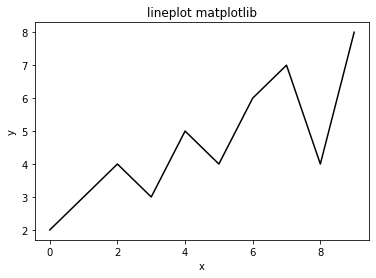

In [33]:
# pyplot을 이용한 꺾은선 그래프

from matplotlib import pyplot as plt    # 그래프를 그리는 라이브러리를 불러옴
%matplotlib inline                
# 그래프를 JupyterNotebook에 바로 표시하기 위해 지정함

x = np.array([0,1,2,3,4,5,6,7,8,9])     # x에 [0,1,2,3,4,5,6,7,8,9] 배열 저장
y = np.array([2,3,4,3,5,4,6,7,4,8])     # y에 [2,3,4,3,5,4,6,7,4,8] 배열 저장

plt.plot(x, y, color = 'black')         # x, y를 이용하여 검정색으로 그래프를 그림
plt.title("lineplot matplotlib")        # 그래프의 이름을 "lineplot matplotlib"로 함
plt.xlabel("x")                         # x축의 이름을 "x"로 함
plt.ylabel("y")                         # y축의 이름을 "y"로 함

plt.savefig("꺾은선 그래프")               # 그래프의 이름을 "꺾은선 그래프"로 저장

Text(0, 0.5, 'y')

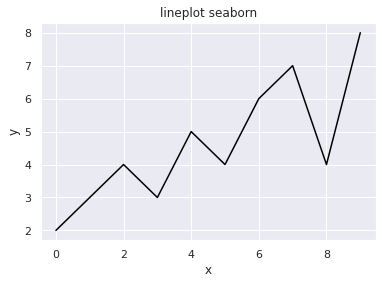

In [34]:
# seaborn + pyplot을 이용한 꺾은선 그래프
import seaborn as sns       # seaborn을 sns로 불러옴.
sns.set()       # 그래프의 디자인을 바꾸게 해줌

plt.plot(x, y, color = 'black')     # x, y를 이용하여 검정색으로 그래프를 그림
plt.title("lineplot seaborn")       # 그래프의 이름을 "lineplot seaborn"로 함
plt.xlabel("x")                     # x축의 이름을 "x"로 함
plt.ylabel("y")                     # y축의 이름을 "y"로 함

<ipython-input-37-f97d1e93342c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fish_data, bins = 5, color = 'black', kde = False) #   fish_data 데이터를 구간 개수 5개 검정색으로 kde 없이 히스토그램을 그림


<Axes: >

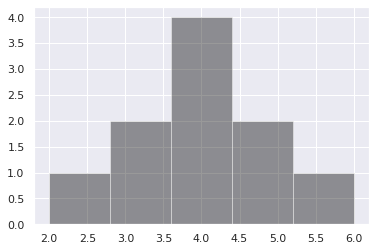

In [37]:
# seaborn을 이용한 히스토그램
fish_data = np.array([2,3,3,4,4,4,4,5,5,6])     # [2,3,3,4,4,4,4,5,5,6] 배열을 fish_data에 저장
sns.distplot(fish_data, bins = 5, color = 'black', kde = False) #   fish_data 데이터를 구간 개수 5개 검정색으로 kde 없이 히스토그램을 그림
# sns.distplot(fish_data, bins = 5, color = 'black', kde = True)    fish_data 데이터를 구간 개수 5개 검정색으로 kde와 히스토그램을 그림

<ipython-input-39-028fb66dd712>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fish_data, bins = 1, color = 'black', kde = False) #   fish_data 데이터를 구간 개수 1개 검정색으로 kde 없이 히스토그램을 그림


<Axes: >

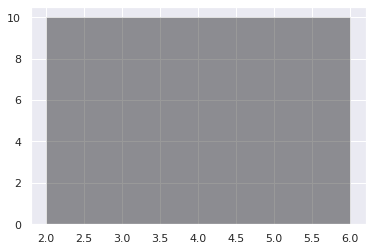

In [39]:
sns.distplot(fish_data, bins = 1, color = 'black', kde = False) #   fish_data 데이터를 구간 개수 1개 검정색으로 kde 없이 히스토그램을 그림

<ipython-input-38-a95fd7644131>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fish_data, color = 'black')    # 히스토그램의 면접 합이 1이 되도록 세로축 변경


<Axes: ylabel='Density'>

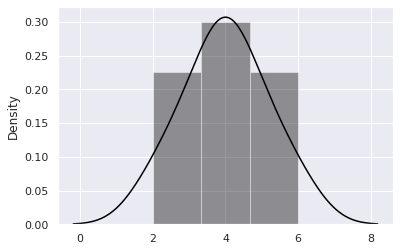

In [38]:
# 히스토그램 평활화
sns.distplot(fish_data, color = 'black')    # 히스토그램의 면적 합이 1이 되도록 세로축 변경

In [41]:
# 변량 데이터에 대한 히스토그램
fish_multi = pd.read_csv("3-3-2-fish_multi_2.csv")  # fish_multi 변수에 "3-3-2-fish_multi.csv"을 불러와서 저장
fish_multi.groupby("species").describe()            # 종류별로 fish_multi의 통계(개수, 평균, 표준편차, 최대, 최소, 백분위별 값)를 보여줌

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [42]:
length_a = fish_multi.query('species == "A"')["length"]     # A 종류의 길이 데이터를 꺼내서 length_a에 저장
length_b = fish_multi.query('species == "B"')["length"]     # B 종류의 길이 데이터를 꺼내서 length_b에 저장

<ipython-input-43-ee5dec6faf3c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(length_a, bins = 5, color = 'red', kde = False)    #   A 종류의 길이 데이터를 빨간색으로 kde 없이 히스토그램을 그림
<ipython-input-43-ee5dec6faf3c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(length_b, bins = 5, color = 'blue', kde = 

<Axes: xlabel='length'>

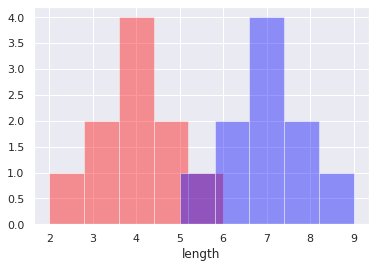

In [43]:
sns.distplot(length_a, bins = 5, color = 'red', kde = False)    #   A 종류의 길이 데이터를 빨간색으로 kde 없이 히스토그램을 그림
sns.distplot(length_b, bins = 5, color = 'blue', kde = False)    #   B 종류의 길이 데이터를 파란색으로 kde 없이 히스토그램을 그림

In [ ]:
sns.boxplot(x = "species", y = "length", data = fish_multi)     #   x축은 종, y축은 길이로 fish_multi에 대한 box plot을 그림.

<Axes: xlabel='species', ylabel='length'>

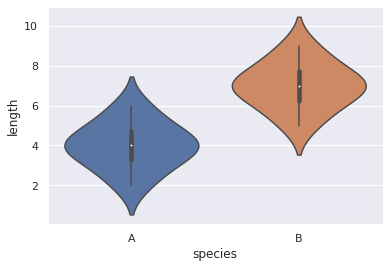

In [45]:
sns.violinplot(x = "species", y = "length", data = fish_multi)  #   x축은 종, y축은 길이로 fish_multi에 대한 violinplot을 그림.

<Axes: xlabel='species', ylabel='length'>

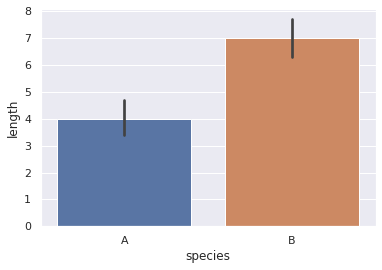

In [46]:
sns.barplot(x = "species", y = "length", data = fish_multi)     # x축은 종, y축은 길이로 fish_multi에 대한 barplot을 그림.

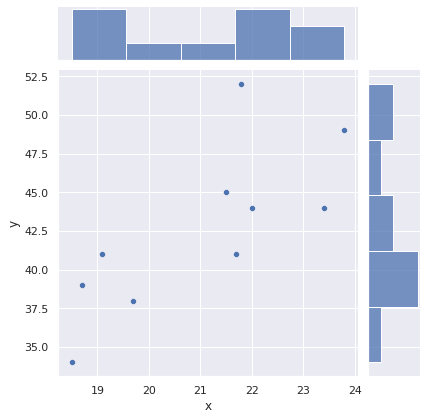

In [47]:
# 산포도
cov_data = pd.read_csv("3-2-3-cov.csv")     # 3-2-3-cov.csv을 읽어와서 cov_data에 저장
sns.jointplot(x = "x", y = "y", data = cov_data)    # cov_data에 대한 스캐터 플롯과 히스토그램을 그림.

In [50]:
iris = sns.load_dataset("iris")     # seaborn 내장 붓꽃 데이터 iris를 읽어와서 iris 변수에 저장
iris.head(n = 3)                    # 상위 3개 데이터를 보여줌

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


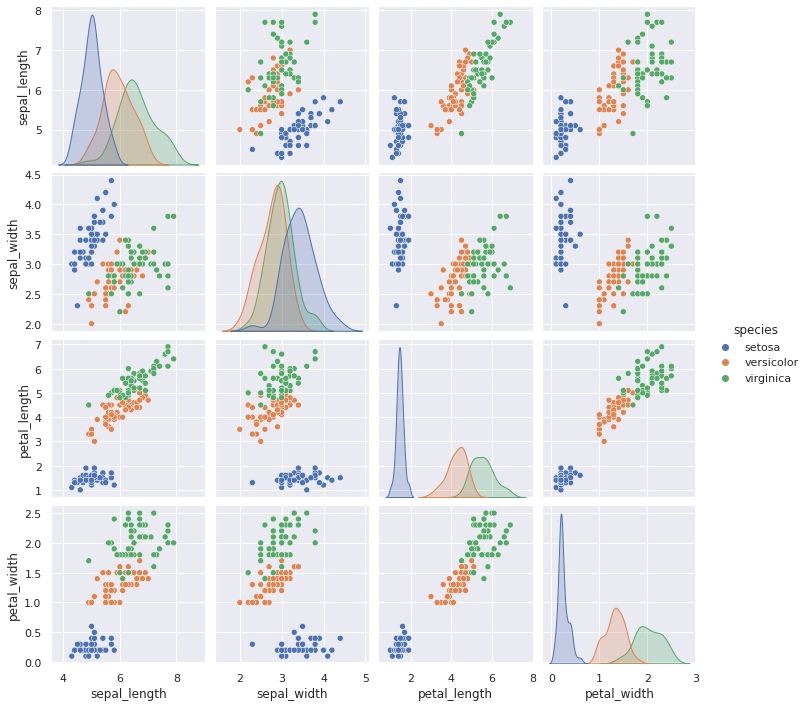

In [51]:
iris.groupby("species").mean()      # 각 species별로 변수에 대한 평균을 구함
sns.pairplot(iris, hue = "species") # 각 species를 변수로 하여 각 변수별로 pairplot을 그림